In [42]:
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image, display
import pickle

import warnings

def load_pickle(file_path):
    """
    Loads DataFrames, dictionaries, and trained models from a .pkl file.

    Parameters:
    - file_path (str): The file path of the .pkl file.

    Returns:
    - Any: The loaded file object.
    """
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=DeprecationWarning)
        with open(file_path, 'rb') as file:
            return pickle.load(file)
# Load a dictionary containing training data
training_dict = load_pickle('training_dict.pkl')

In [36]:
P1 = "Nc1ccccc1"
P2 = "COc1cccc(Br)c1"
P3 = "COc1ccc(OC)c(N)c1"
P4 = "CCc1ccc(Br)cc1"

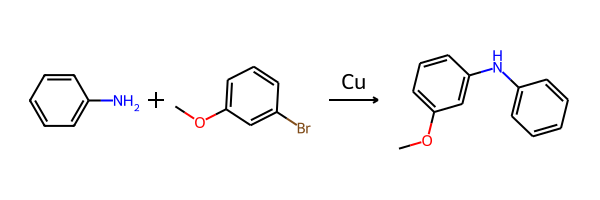

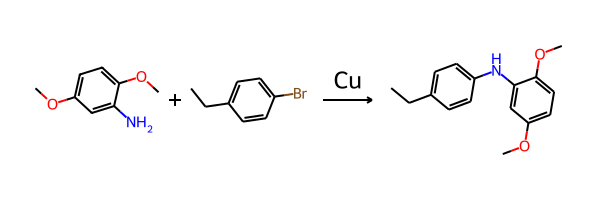

In [38]:
def draw_reaction_image(amine_smiles, br_smiles):
    # Define the reaction SMARTS
    reaction_smarts = '[N:1].[c:2]-Br>>[c:2]-[N:1]'

    # Create an RDKit reaction from SMARTS
    rxn = AllChem.ReactionFromSmarts(reaction_smarts)

    # Run the reaction
    ps = rxn.RunReactants((Chem.MolFromSmiles(amine_smiles), Chem.MolFromSmiles(br_smiles)))

    # Get the SMILES of the product
    product_smiles = Chem.MolToSmiles(ps[0][0])

    # Create RDKit molecule from product SMILES
    product_mol = Chem.MolFromSmiles(product_smiles)

    # Create RDKit reaction from SMILES
    rxn_prod = AllChem.ReactionFromSmarts(f'{amine_smiles}.{br_smiles}>{"[Cu]"}>{product_smiles}', useSmiles=True)

    # Draw the reaction with reactants and product
    d2d = rdMolDraw2D.MolDraw2DCairo(600, 200)

    d2d.drawOptions().minFontSize = 15
    d2d.DrawReaction(rxn_prod)
    d2d.FinishDrawing()

    # Get the PNG image
    png = d2d.GetDrawingText()

    # Display the image
    display(Image(png))

    
draw_reaction_image(P1, P2)
draw_reaction_image(P3, P4)

In [ ]:
drawer = rdMolDraw2D.MolDraw2DSVG(-1,-1)
dopts = drawer.drawOptions()
Draw.SetACS1996Mode(dopts,Draw.MeanBondLength(reactant1)*0.70)
dopts.bondLineWidth = 1.5 # default is 2.0
drawer.DrawReaction(rxn)
drawer.FinishDrawing()